### EX04 - Deutsch-Jozsa

Recreate the Deutsch-Jozsa algorithm, it should work with a total number
of 4 qubits.

Here is the Oracle gate :                               
q_0: ───────■─────────────────
     ┌───┐  │       ┌───┐     
q_1: ┤ X ├──┼────■──┤ X ├─────
     ├───┤  │    │  └───┘┌───┐
q_2: ┤ X ├──┼────┼────■──┤ X ├
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐└───┘
q_3: ─────┤ X ├┤ X ├┤ X ├─────
          └───┘└───┘└───┘     
Oracle is of type : Balanced
     ┌───┐     ┌─────────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├──────
     ├───┤     │         │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├───
     ├───┤     │  Oracle │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2        ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3        ├──────╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 


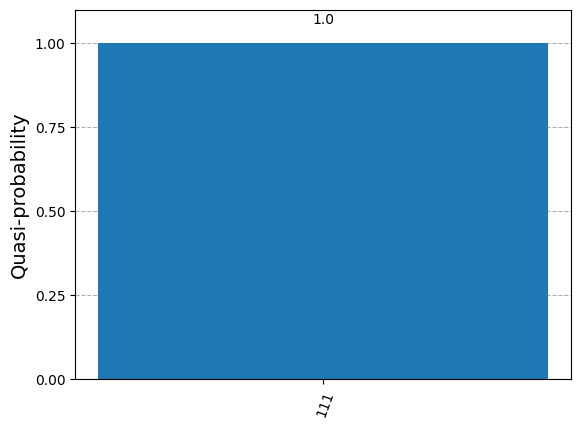

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.visualization import plot_histogram
from random import choice
from qiskit import transpile
import numpy as np


nbShots = 1000
nbQubits = 3
qc = QuantumCircuit(nbQubits + 1, nbQubits + 1)

for i in range(0, nbQubits):
    qc.h(i)

def Oracle(n):
    oracle_type = choice(['Constant','Balanced'])
    gate = QuantumCircuit(n + 1)
    if oracle_type == 'Constant':
        output = np.random.randint(2)
        if output == 1:
            gate.x(n);
    elif oracle_type == 'Balanced':
        b = np.random.randint(1,2**n)
        b_str = format(b, '0'+str(n)+'b')
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                gate.x(qubit)
        for qubit in range(n):
            gate.cx(qubit, n)
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                gate.x(qubit)
    print ("Here is the Oracle gate :", gate)
    gate = gate.to_gate()
    gate.name = "Oracle"
    return gate, oracle_type

def algo(gate,n):
    algo_circuit = QuantumCircuit(n + 1, n)
    algo_circuit.x(n)
    algo_circuit.h(n)
    for qubit in range(n):
        algo_circuit.h(qubit)

    algo_circuit.append(gate, range(n + 1))
    for qubit in range(n):
        algo_circuit.h(qubit)
    for i in range(n):
        algo_circuit.measure(i, i)
    return algo_circuit

gate, oracle_type = Oracle(nbQubits)
circuit = algo(gate, nbQubits)
sim = AerSimulator()
transpiled_dj_circuit = transpile(circuit, sim)
counts = AerSimulator().run(circuit.decompose(), shots=nbShots).result().get_counts()
render = {key: value / nbShots for key, value in counts.items()}

print ("Oracle is of type :", oracle_type)
print (circuit)
plot_histogram(render)